# (Ford GoBike System Data)
## by (Mohammed Almuylibi)

## Preliminary Wrangling

> The dataset belongs to Ford GoBike System which has multiple information regarding the bike ride and its customers.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
#load the dataset.
bike = pd.read_csv('baywheels.csv')

bike.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
164068,140,2019-10-10 11:44:50.3340,2019-10-10 11:47:10.4380,123,Folsom St at 19th St,37.760594,-122.414817,122,19th St at Mission St,37.760299,-122.418892,901,Subscriber,1991.0,Male,No
36478,2539,2019-10-27 10:33:14.8320,2019-10-27 11:15:33.8720,371,Lombard St at Columbus Ave,37.802746,-122.413579,399,Bay St at Fillmore St,37.802636,-122.436289,10331,Customer,1962.0,Male,No
98666,891,2019-10-18 18:11:45.4200,2019-10-18 18:26:37.2910,357,2nd St at Julian St,37.341132,-121.892844,357,2nd St at Julian St,37.341132,-121.892844,12812,Subscriber,1996.0,Male,Yes
73496,733,2019-10-22 17:07:49.1480,2019-10-22 17:20:02.3030,104,4th St at 16th St,37.767045,-122.390833,108,16th St Mission BART,37.764710,-122.419957,2884,Subscriber,1977.0,Male,No
176163,185,2019-10-09 05:54:55.6920,2019-10-09 05:58:01.4040,54,Alamo Square (Steiner St at Fulton St),37.777547,-122.433274,31,Raymond Kimbell Playground,37.783813,-122.434559,9692,Customer,NaN,NaN,No
141792,1091,2019-10-13 14:35:10.2870,2019-10-13 14:53:21.6850,468,Grove St at Gough St,37.777870,-122.422953,324,Union Square (Powell St at Post St),37.788300,-122.408531,11440,Customer,NaN,NaN,No
160316,1178,2019-10-10 18:25:30.4990,2019-10-10 18:45:08.7930,401,Skyport Dr at Technology Dr,37.365227,-121.916815,291,Autumn Parkway at Coleman Ave,37.341335,-121.903183,10696,Subscriber,1996.0,Male,Yes
44116,673,2019-10-25 17:55:05.1500,2019-10-25 18:06:18.9290,16,Steuart St at Market St,37.794130,-122.394430,92,Mission Bay Kids Park,37.772301,-122.393028,9463,Subscriber,1984.0,Male,No
120307,871,2019-10-16 09:08:45.5530,2019-10-16 09:23:17.0140,72,Page St at Scott St,37.772406,-122.435650,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,12406,Subscriber,1988.0,Male,No
58110,560,2019-10-24 09:09:51.1580,2019-10-24 09:19:11.7840,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,37,Folsom St at 2nd St,37.785377,-122.396906,370,Customer,NaN,NaN,No


In [5]:
#looking up the shape and info of dataset.
print(bike.shape)
print(bike.info())

(239895, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239895 entries, 0 to 239894
Data columns (total 16 columns):
duration_sec               239895 non-null int64
start_time                 239895 non-null object
end_time                   239895 non-null object
start_station_id           239895 non-null int64
start_station_name         239895 non-null object
start_station_latitude     239895 non-null float64
start_station_longitude    239895 non-null float64
end_station_id             239895 non-null int64
end_station_name           239895 non-null object
end_station_latitude       239895 non-null float64
end_station_longitude      239895 non-null float64
bike_id                    239895 non-null int64
user_type                  239895 non-null object
member_birth_year          189678 non-null float64
member_gender              189679 non-null object
bike_share_for_all_trip    239895 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 29.3+ MB
None


### What is the structure of your dataset?

> The dataset has 16 columns and 239895 rows about each rental.

### What is/are the main feature(s) of interest in your dataset?

> The main interest or point of this analysis is to know the customers of the service which give us valuable insights to better the service and find the right population to market the service to.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> There are many columns would help us understand the customers better like the gender, birth year, user type, duration, and start station.

## Univariate Exploration

> In this section I will investigate individual variables.

I will look at the beginning what is the most popular start station. 

In [35]:
#looking up the the top five stations as start station.
print(bike.start_station_id.value_counts().head(5))
print(bike.start_station_name.value_counts().head(5))

30    5334
58    3476
81    3264
22    2798
21    2749
Name: start_station_id, dtype: int64
San Francisco Caltrain (Townsend St at 4th St)      5334
Market St at 10th St                                3476
Berry St at 4th St                                  3264
Howard St at Beale St                               2798
Montgomery St BART Station (Market St at 2nd St)    2749
Name: start_station_name, dtype: int64


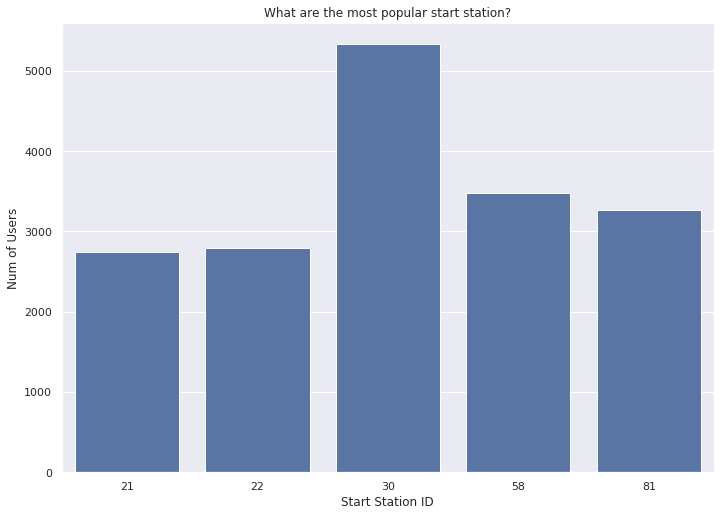

In [49]:
#Plotting the fisrt five start station.

start_st = bike.start_station_id.value_counts().head(5)
base_color = sb.color_palette()[0]
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.barplot(data = bike, x = start_st.index, y = start_st, color = base_color)
ax.set_title('What are the most popular start station?')
plt.ylabel('Num of Users')
plt.xlabel('Start Station ID')
plt.show()

###### We can notice San Francisco Caltrain(ID num 30) is very popular as end station.

In [36]:
#looking up the the top five stations as end station.
print(bike.end_station_id.value_counts().head(5))
print(bike.end_station_name.value_counts().head(5))

30    7933
21    4241
15    3447
81    3317
58    3313
Name: end_station_id, dtype: int64
San Francisco Caltrain (Townsend St at 4th St)        7933
Montgomery St BART Station (Market St at 2nd St)      4241
San Francisco Ferry Building (Harry Bridges Plaza)    3447
Berry St at 4th St                                    3317
Market St at 10th St                                  3313
Name: end_station_name, dtype: int64


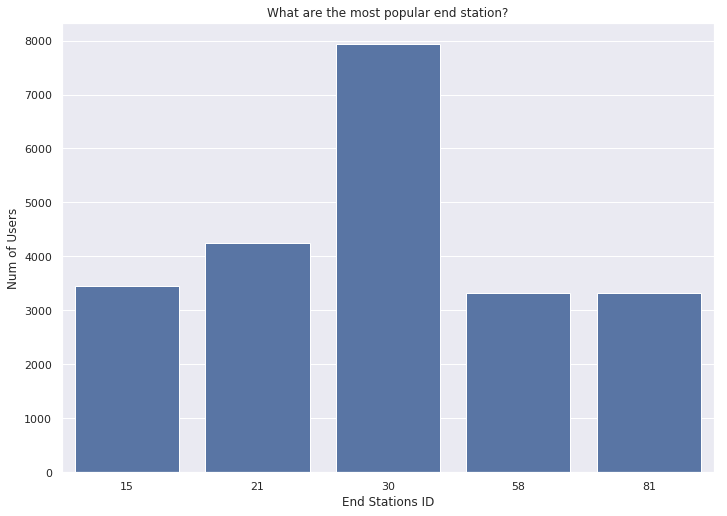

In [50]:
#Plotting the fisrt five end station.
end_st = bike.end_station_id.value_counts().head(5)
base_color = sb.color_palette()[0]
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.barplot(data = bike, x = end_st.index, y = end_st, color = base_color)
ax.set_title('What are the most popular end station?')
plt.ylabel('Num of Users')
plt.xlabel('End Stations ID')
plt.show()

###### We can notice San Francisco Caltrain(ID num 30) is very popular as end station.

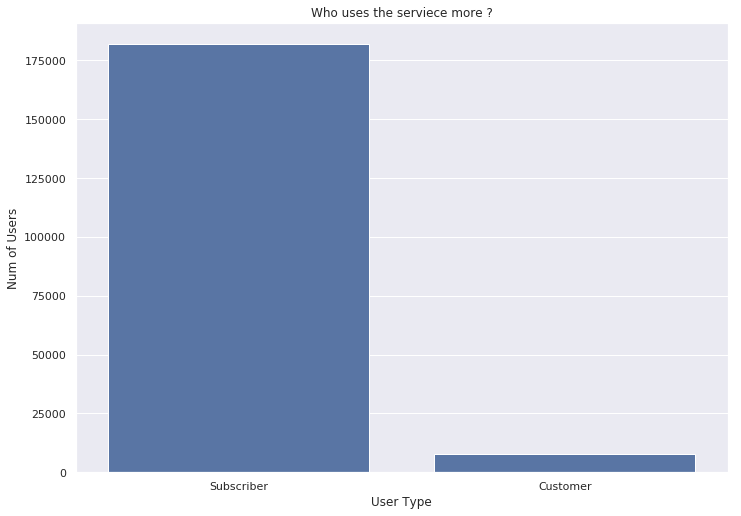

In [48]:
#Plotting the customer number based on the type of user.
sb.set(style="darkgrid")
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.countplot(data = bike, x = 'user_type', color = base_color)
ax.set_title('Who uses the serviece more ?')
plt.ylabel('Num of Users')
plt.xlabel('User Type')
plt.show()

###### From the plot above we can see that subscribers use the service more than regular customer.

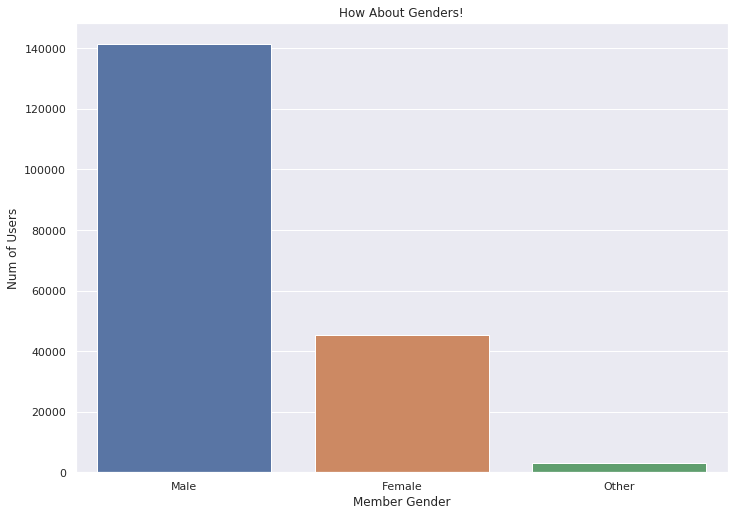

In [78]:
#Plotting the customer number based on gender.
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.countplot(data = bike, x = 'member_gender');
ax.set_title('How About Genders!');
plt.ylabel('Num of Users');
plt.xlabel('Member Gender');
plt.show()

###### Males are the highest number of users in the gender spectrum.

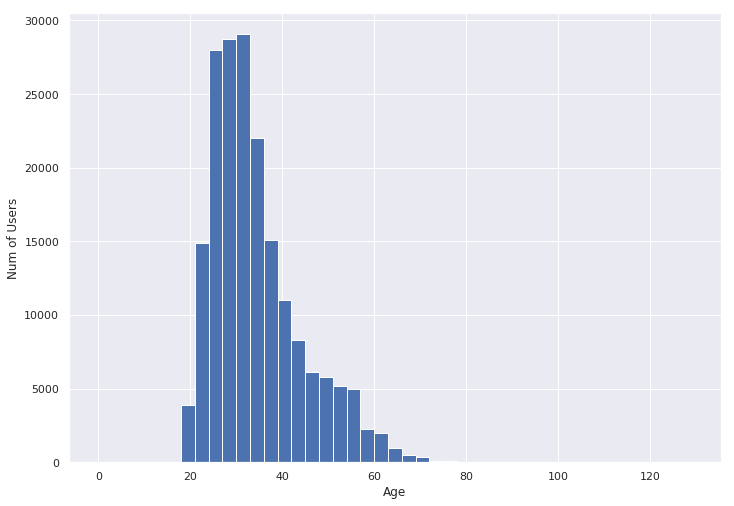

In [122]:
#convert member birth year to int and plotting it.
bike_age = bike[bike['member_birth_year'].notnull()]
bike.member_birth_year = pd.to_datetime(bike.member_birth_year);
bike.member_birth_year = bike.member_birth_year.astype(int,copy=False);
bike['member_age'] = 2019 - bike.member_birth_year;
bike.drop(bike[bike.member_age < 0].index, inplace = True);
bins = np.arange(0, bike['member_age'].max(), 3);
plt.figure(figsize=[ 11.69, 8.27]);
plt.hist(data = bike, x = 'member_age', bins = bins);
plt.ylabel('Num of Users');
plt.xlabel('Age');

plt.show()

###### People in mid-twenties and mid-thirties are the most popular users which tell us the which group of people we can market to.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of age is left skewed which shows that most of the users are considered young. There was no need to do any major transformation on the datase.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The only We converted member birth year to int in order to look up the age of each member to plot the age distribution of the users. Males are using the service far more than women.

## Bivariate Exploration

> In this section, investigate relationships between pairs of columns.

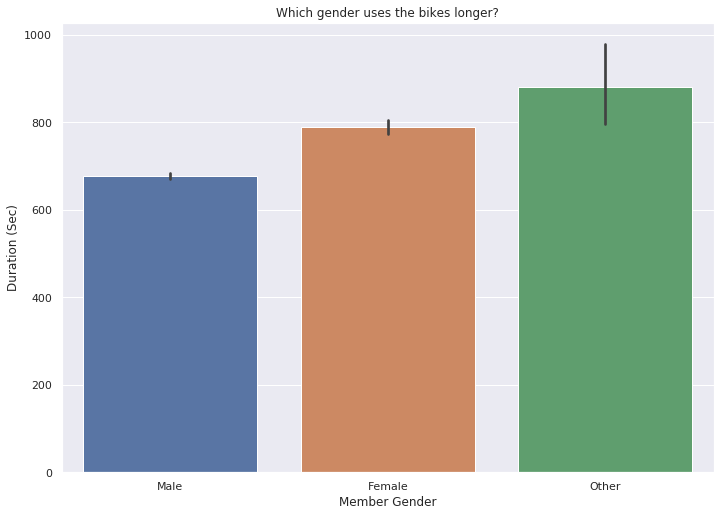

In [44]:
#Plotting of gender based on the duration of using the service.
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec');
ax.set(xlabel='Member Gender', ylabel='Duration (Sec)');
ax.set_title('Which gender uses the bikes longer?');

##### From the chart it is obvouis that people who dont identify themselve as male or female are using the service more than the rest while females come second and males come third.

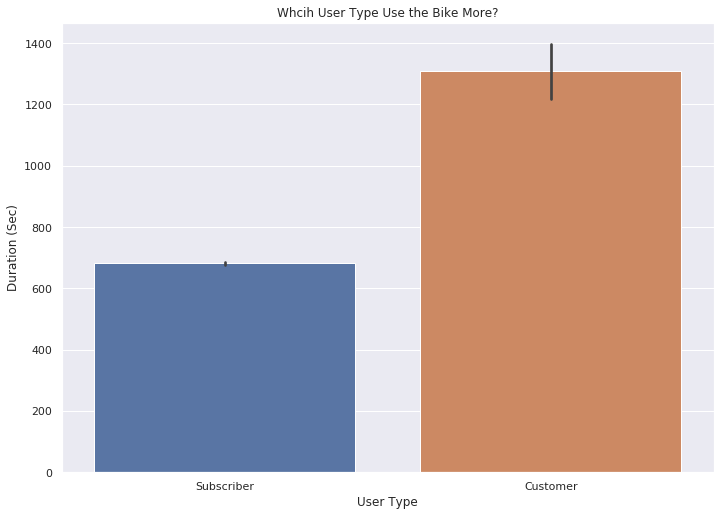

In [43]:
#Plotting user type base on the duration of using the service
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.barplot(data = bike, x = 'user_type', y = 'duration_sec');
ax.set(xlabel='User Type', ylabel='Duration (Sec)');
ax.set_title('Whcih User Type Use the Bike More?');

##### Random customers are using the service longer than the subscribers.

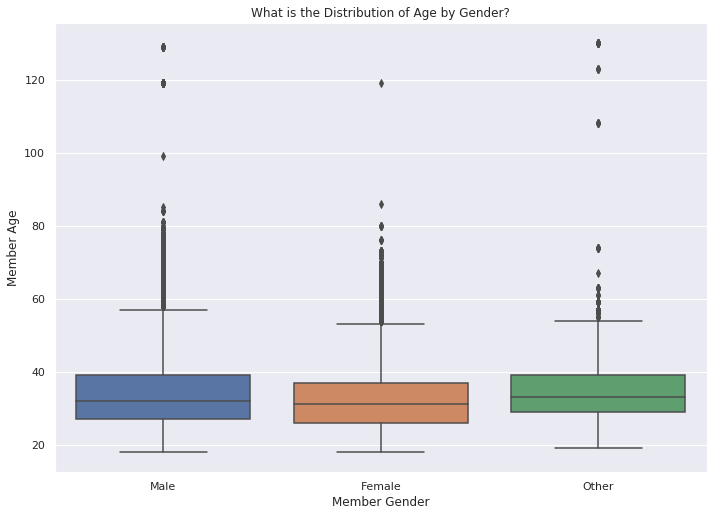

In [70]:
#Plot of the age and gender of customers.
plt.figure(figsize=[ 11.69, 8.27])
ax = sb.boxplot(x=bike["member_gender"], y=bike["member_age"]);
ax.set(xlabel='Member Gender', ylabel='Member Age');
ax.set_title('What is the Distribution of Age by Gender?');



##### Males users are older and have a wider spectrum of users age that the Female users who concentrate in the younger generation

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We can notice that Female users and non-binary use the service longer than Male users. Also, customers use the service for a longer duration than subscribers of the bike service. Moreover, Male users tend to be older than females.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a relationship between the customers and duration of use that migh require a deeper look into, it seems like subscribers don't use the serverice as long as customers but they use it more often. There were some null that I had to drop in the age column.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

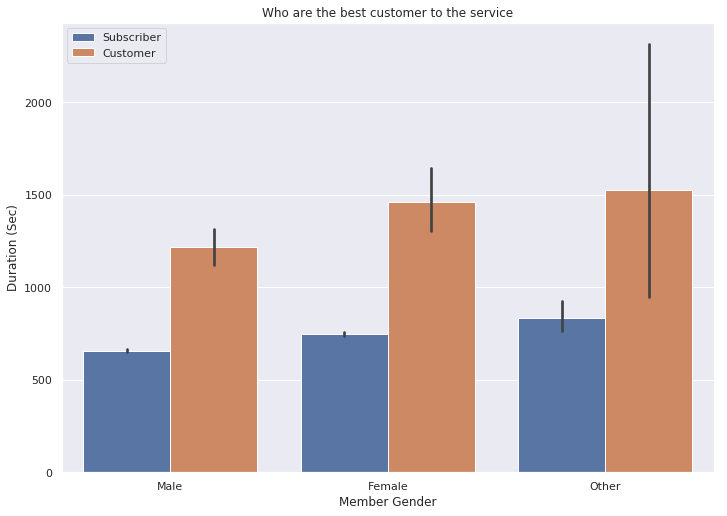

In [63]:
#Plot the gender and duration and user type to figure out the best customers.
plt.figure(figsize=[ 11.69, 8.27]);
ax = sb.barplot(data = bike, x = 'member_gender', y = 'duration_sec', hue = 'user_type')
ax.set(xlabel='Member Gender', ylabel='Duration (Sec)')
ax.set_title('Who are the best customer to the service')
ax.legend()
plt.show()

###### Females and others are using the service longer than man wethear they are subscriber or regular customer. In fact, males are scoring the lowest both as customers or subscribers in the duration of use, even though males are using the serviece more often.

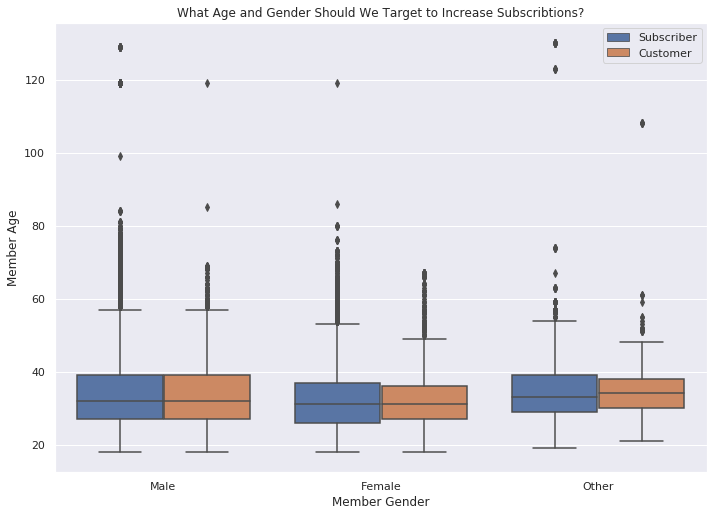

In [121]:
#Plot the gender and age and user type to figure out who the potential customers.
plt.figure(figsize=[ 11.69, 8.27]);
ax = sb.boxplot(x=bike["member_gender"], y=bike["member_age"], hue = bike['user_type']);
ax.set(xlabel='Member Gender', ylabel='Member Age');
ax.set_title('What Age and Gender Should We Target to Increase Subscribtions?');
ax.legend();
plt.show()

###### There is a bigger chance to attract males between 25 to 40 and others above 30 to subscribe in the service. While females subscribers and customers sharing the same median.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This part of the analysis looked deeply at every gender and its use of the service better than the two before, which will allow us to draw better conclusions to which population to market to and 

### Were there any interesting or surprising interactions between features?

> The multivariate analysis give us a more clear graphs to understand the customers in general. The interactions between multiple columns provide us with the bigger picture that leads us to interpreting the dataset.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!